In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

## Generate Random Latitudes and Longitudes

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#unzip latitudes and longitudes to a tuple list,  you only unzip it 1x!
coordinates = list(lat_lngs)


## Generate Random World Cities

In [4]:
#Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)


619

## Make an API Call

In [5]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [6]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


## Get City Weather Data
#### Note: to retrieve both the index and city: for i, item in enumerate(list): 
#### Note: Try and except block to handle errors

In [7]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
 
    # Run API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | seoul
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | irati
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | keti bandar
Processing Record 16 of Set 1 | khonuu
City not found. Skipping...
Processing Record 17 of Set 1 | monywa
Processing Record 18 of Set 1 | raudeberg
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | galle
Processing Record 39 of Set 4 | pevek
Processing Record 40 of Set 4 | batagay
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | nadym
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | albert
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | hobyo
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | andenes
Processing Record 1 of Set 5 | khash
Processing Record 2 of Set 5 | tabas
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | lokoja
Processing Record 7 of Set 5 | sinop
Processing Record 8 of Set 5 | grand gaube
Processing Record 9 of Set 5 | taltal
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | khatanga
Processing Record 12 of S

Processing Record 29 of Set 8 | kailua
Processing Record 30 of Set 8 | glendive
Processing Record 31 of Set 8 | padang
Processing Record 32 of Set 8 | bereda
Processing Record 33 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 34 of Set 8 | la plaine
Processing Record 35 of Set 8 | synya
Processing Record 36 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | suntar
Processing Record 40 of Set 8 | bonavista
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | weiser
Processing Record 43 of Set 8 | lokken verk
City not found. Skipping...
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 46 of Set 8 | shakawe
Processing Record 47 of Set 8 | port hedland
Processing Record 48 of Set 8 | havre-saint-pierre
Processing Record 49 of Set 8 | mazagao
P

Processing Record 18 of Set 12 | nuevitas
Processing Record 19 of Set 12 | merauke
Processing Record 20 of Set 12 | shimoda
Processing Record 21 of Set 12 | sabha
Processing Record 22 of Set 12 | sept-iles
Processing Record 23 of Set 12 | north platte
Processing Record 24 of Set 12 | halalo
City not found. Skipping...
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | maracaibo
Processing Record 27 of Set 12 | putla
City not found. Skipping...
Processing Record 28 of Set 12 | wanning
Processing Record 29 of Set 12 | clyde river
Processing Record 30 of Set 12 | port hardy
Processing Record 31 of Set 12 | kabare
Processing Record 32 of Set 12 | warman
Processing Record 33 of Set 12 | abaza
Processing Record 34 of Set 12 | mao
Processing Record 35 of Set 12 | barroquinha
Processing Record 36 of Set 12 | canaries
Processing Record 37 of Set 12 | longyan
Processing Record 38 of Set 12 | nioro
Processing Record 39 of Set 12 | bolungarvik
City not found. Skipping...
Proce

In [9]:
print(len(city_data))

571


## Create DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,71.67,88,100,4.61,AU,2022-02-01 22:55:42
1,Punta Arenas,-53.1500,-70.9167,50.11,53,20,33.38,CL,2022-02-01 22:55:42
2,Geraldton,-28.7667,114.6000,84.61,26,53,27.63,AU,2022-02-01 22:55:43
3,Mahebourg,-20.4081,57.7000,80.26,100,75,18.41,MU,2022-02-01 22:55:08
4,Hasaki,35.7333,140.8333,36.00,50,0,18.90,JP,2022-02-01 22:55:43
5,Rikitea,-23.1203,-134.9692,78.44,69,87,5.66,PF,2022-02-01 22:54:59
6,Hermanus,-34.4187,19.2345,69.91,81,16,3.67,ZA,2022-02-01 22:53:13
7,Bluff,-46.6000,168.3333,76.80,63,97,12.95,NZ,2022-02-01 22:55:44
8,Seoul,37.5683,126.9778,26.11,92,40,2.30,KR,2022-02-01 22:55:00
9,Kaitangata,-46.2817,169.8464,72.93,74,100,10.58,NZ,2022-02-01 22:55:45


In [11]:
#assign variable to hold new order of columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#apply new order to df
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2022-02-01 22:55:42,-24.8667,113.6333,71.67,88,100,4.61
1,Punta Arenas,CL,2022-02-01 22:55:42,-53.1500,-70.9167,50.11,53,20,33.38
2,Geraldton,AU,2022-02-01 22:55:43,-28.7667,114.6000,84.61,26,53,27.63
3,Mahebourg,MU,2022-02-01 22:55:08,-20.4081,57.7000,80.26,100,75,18.41
4,Hasaki,JP,2022-02-01 22:55:43,35.7333,140.8333,36.00,50,0,18.90


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plots

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

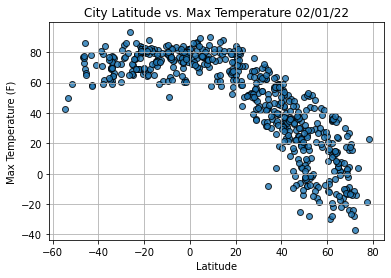

In [14]:
#Import time module (will use in title)
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, 
            label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

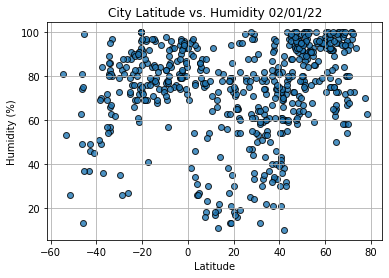

In [15]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

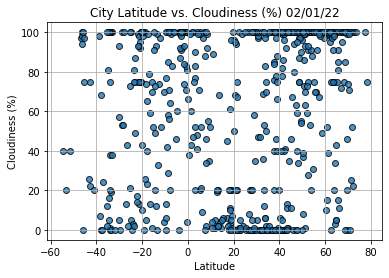

In [16]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

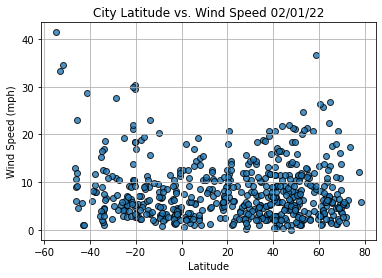

In [17]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

## Linear Regression Function

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

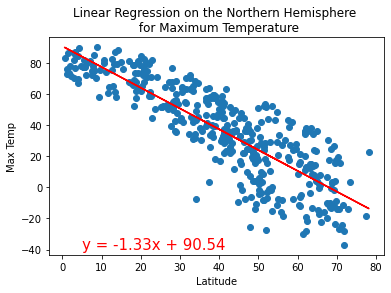

LinregressResult(slope=-1.3324824017988126, intercept=90.54411868381962, rvalue=-0.8462447580269539, pvalue=6.990729087141932e-111, stderr=0.0420517000127348, intercept_stderr=1.882718648643375)

In [33]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,-40))
linregress(x_values, y_values)

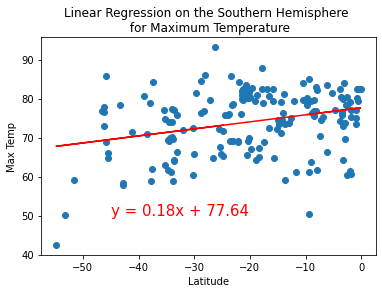

LinregressResult(slope=0.18036188088628566, intercept=77.64465645541263, rvalue=0.2959261152139024, pvalue=8.50387306212797e-05, stderr=0.044783429562918496, intercept_stderr=1.0870996834548932)

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-45,50))
linregress(x_values, y_values)

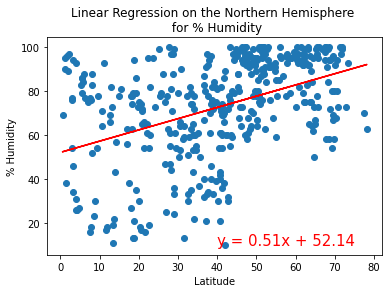

LinregressResult(slope=0.5114616817658435, intercept=52.13749558511638, rvalue=0.4277317854642917, pvalue=3.1830064729949995e-19, stderr=0.05417802485761011, intercept_stderr=2.425632678707328)

In [35]:
#Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',
                       (40,10))
linregress(x_values, y_values)

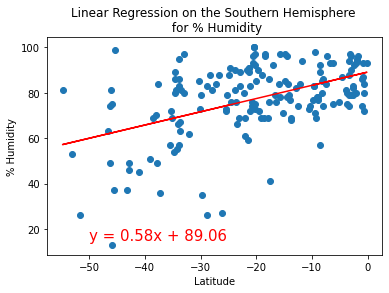

LinregressResult(slope=0.5821312349584349, intercept=89.05862881888662, rvalue=0.48023925157979275, pvalue=2.9939100123886924e-11, stderr=0.08178762448862648, intercept_stderr=1.9853615848513242)

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',
                        (-50,15))
linregress(x_values, y_values)

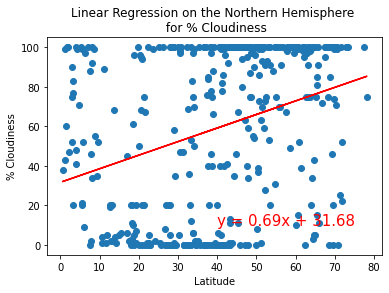

LinregressResult(slope=0.6858329444095341, intercept=31.684560058615542, rvalue=0.32068213866341233, pvalue=5.105531079200852e-11, stderr=0.10154012753818172, intercept_stderr=4.546106141817517)

In [37]:
#Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',
                       (40,10))
linregress(x_values, y_values)

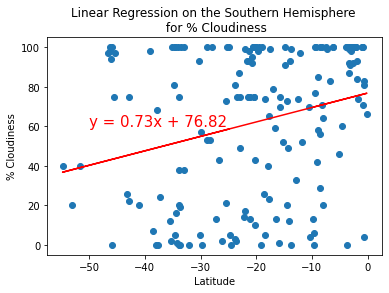

LinregressResult(slope=0.7305218180461867, intercept=76.819673513993, rvalue=0.26248041015260587, pvalue=0.0005239284019122423, stderr=0.20658179520196643, intercept_stderr=5.014689727058187)

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',
                       (-50,60))
linregress(x_values, y_values)

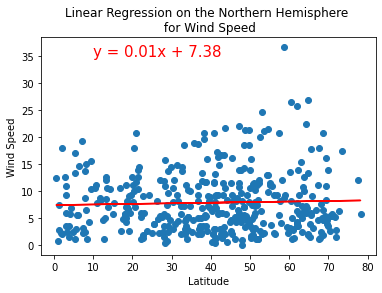

LinregressResult(slope=0.01089060896620293, intercept=7.381898728641336, rvalue=0.03748001254704019, pvalue=0.45475151141684145, stderr=0.014554780114683596, intercept_stderr=0.6516396707034452)

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,35))
linregress(x_values, y_values)

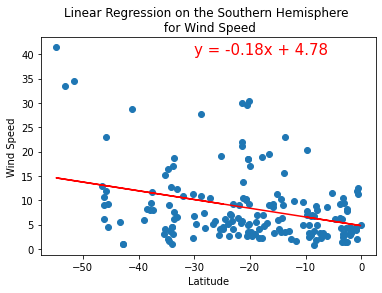

LinregressResult(slope=-0.1791374884059448, intercept=4.782091978830737, rvalue=-0.3351429020616664, pvalue=7.440212987969297e-06, stderr=0.038738351283240206, intercept_stderr=0.9403578472794046)

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-30,40))
linregress(x_values, y_values)